**Importamos la librerías de uso general**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Cargamos nuetros datasets**

In [2]:
mndata_train = pd.read_csv('data/train.csv')
mndata_test = pd.read_csv('data/test.csv')

In [3]:
print('Dimensiones: ',mndata_train.shape)
mndata_train.head()

Dimensiones:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print('Dimensiones: ',mndata_test.shape)
mndata_test.head()

Dimensiones:  (10000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Creamos nuestras variables de entrenamiento**

In [5]:
X_train = (mndata_train.iloc[:,1:].values).astype('float32')

In [6]:
y_train = (mndata_train.label.values).astype('float32')

**Así se ven algunos de los número en el set de entrenamiento**

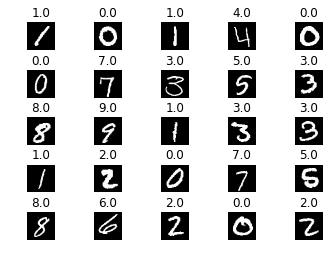

In [7]:
plt.gray()

for i in range (25):
    plt.subplot(5,5,i+1)
    d_images = X_train[i]
    pixels = d_images.reshape(28, 28)
    plt.imshow(pixels, cmap = 'gray')
    plt.axis ('off')
    plt.title(y_train[i])
    plt.subplots_adjust(hspace = 0.7, wspace = 0) #Separación de los plots para la buena visualización de los títulos.

plt.show()

**Librerias y funciones comunes para los modelos**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
def evaluate_classifier(clf_model, y_val, X_val):
    predicted = clf_model.predict(X_val)
    cm = confusion_matrix(y_val, predicted)
    return cm

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.tab20c_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3 ,random_state = 45)

**Decision Tree Classifier**

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_predict = decision_tree.predict(X_val)

**Evaluación con datos de validación**

Confusion matrix, without normalization


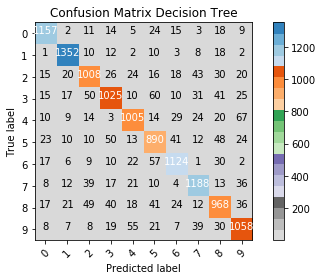

El score del modelo fue de: 85.52 %


In [14]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
cm = evaluate_classifier(decision_tree,y_val,X_val)
plot_confusion_matrix(cm,cm_plot_labels, title = 'Confusion Matrix Decision Tree')
score = cm.diagonal().sum()*100 / cm.sum()
print('El score del modelo fue de: %1.2f' % (score), '%')

**Evaluación con datos de test**

In [15]:
X_test = (mndata_test.iloc[:,1:].values).astype ('float32')
y_test = (mndata_test['label'].values).astype('float32')

Confusion matrix, without normalization


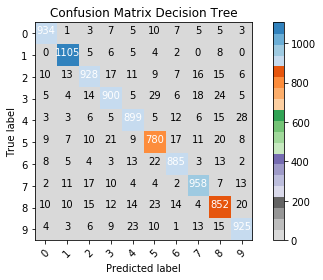

El score del modelo fue de: 91.66 %


In [16]:
cm = evaluate_classifier(decision_tree,y_test,X_test)
plot_confusion_matrix(cm,cm_plot_labels, title = 'Confusion Matrix Decision Tree')
score = cm.diagonal().sum()*100 / cm.sum()
print('El score del modelo fue de: %1.2f' % (score), '%')

**Random Forest**

In [17]:
from sklearn.ensemble import RandomForestClassifier

/home/daniel_py/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [18]:
ran_f_clf = RandomForestClassifier(n_estimators = 150, min_samples_split = 2)
ran_f_clf.fit(X_train, y_train)
ran_f_clf_predict = ran_f_clf.predict(X_val)

**Evaluación con datos de validación**

Confusion matrix, without normalization


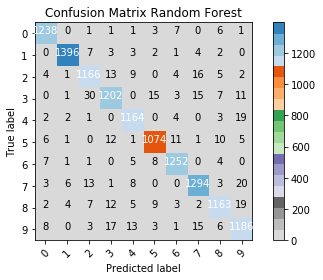

El score del modelo fue de: 96.31 %


In [19]:
cm = evaluate_classifier(ran_f_clf,y_val,X_val)
plot_confusion_matrix(cm,cm_plot_labels, title = 'Confusion Matrix Random Forest')
score = cm.diagonal().sum()*100 / cm.sum()
print('El score del modelo fue de: %1.2f' % (score), '%')

**Evaluación con datos de test**

In [20]:
X_test = (mndata_test.iloc[:,1:].values).astype ('float32')
y_test = (mndata_test['label'].values).astype('float32')

Confusion matrix, without normalization


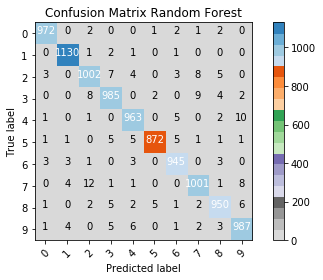

El score del modelo fue de: 98.07 %


In [21]:
cm = evaluate_classifier(ran_f_clf,y_test,X_test)
plot_confusion_matrix(cm,cm_plot_labels, title = 'Confusion Matrix Random Forest')
score = cm.diagonal().sum()*100 / cm.sum()
print('El score del modelo fue de: %1.2f' % (score), '%')

**Dataframe con los valores erróneos en ambos modelos**

In [22]:
comparacion = pd.DataFrame()
comparacion['real'] = y_test
comparacion['pred_decision_tree'] = decision_tree.predict(X_test)
comparacion['pred_random_forest'] = ran_f_clf.predict(X_test)

In [23]:
errores = comparacion[(comparacion['real'] != comparacion['pred_decision_tree']) & (comparacion['real'] != comparacion['pred_random_forest'])]
errores.head(10)

,real,pred_decision_tree,pred_random_forest
142,3.0,2.0,2.0
247,4.0,6.0,2.0
349,3.0,7.0,7.0
381,3.0,7.0,7.0
495,8.0,3.0,2.0
553,8.0,6.0,6.0
582,8.0,2.0,2.0
659,2.0,4.0,8.0
684,7.0,8.0,2.0
691,8.0,4.0,4.0


In [24]:
print('En {} casos los dos modelos se equivocaron en la predicción'.format(len(errores)))
print('En {} casos al menos uno de los dos modelos se equivocó en el predicción'.format(len(comparacion[(comparacion['real'] != comparacion['pred_decision_tree']) | (comparacion['real'] != comparacion['pred_random_forest'])])))
print('El modelo Decision Tree se equivocó en {} casos'.format(len(comparacion[comparacion['real'] != comparacion['pred_decision_tree']])))
print('El modelo Random Forest se equivocó en {} casos'.format(len(comparacion[comparacion['real'] != comparacion['pred_random_forest']])))

En 138 casos los dos modelos se equivocaron en la predicción
En 889 casos al menos uno de los dos modelos se equivocó en el predicción
El modelo Decision Tree se equivocó en 834 casos
El modelo Random Forest se equivocó en 193 casos


**Visualizar valores concretos**

In [25]:
def probar_valor(valor):
    pixels = X_test[valor].reshape(28,28)
    plt.imshow(pixels, cmap = 'gray')
    plt.axis('off')
    plt.show()
    print('El valor real es : {}'.format(y_test[valor]))
    print('El valor predicho por el modelo Decision Tree para este número fue: {}'.format(decision_tree.predict(X_test)[valor]))
    print('El valor predicho por el modelo Random Forest para este número fue: {}'.format(ran_f_clf.predict(X_test)[valor]))

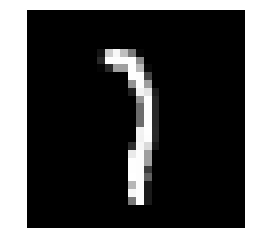

El valor real es : 7.0
El valor predicho por el modelo Decision Tree para este número fue: 1.0
El valor predicho por el modelo Random Forest para este número fue: 1.0
En algunos casos es evidente el porque los modelos tuvieron problema al hacer una correcta predicción


In [26]:
probar_valor(1260) #Se pasa el número del index del número a visualizar
print('En algunos casos es evidente el porque los modelos tuvieron problema al hacer una correcta predicción')

**Vizualizar los valores que ningún modelo predijo satisfactoriamente**

In [27]:
errores_2 = errores.reset_index()
errores_2 = errores_2.rename(columns = {'index': 'index_pasado'})
errores_2.head()

,index_pasado,real,pred_decision_tree,pred_random_forest
0,142,3.0,2.0,2.0
1,247,4.0,6.0,2.0
2,349,3.0,7.0,7.0
3,381,3.0,7.0,7.0
4,495,8.0,3.0,2.0


Populating the interactive namespace from numpy and matplotlib

Estos fueron los 127 números que ninguno de los dos modelos logró predecir correctamente. Encima de cada uno está el valor verdadero.


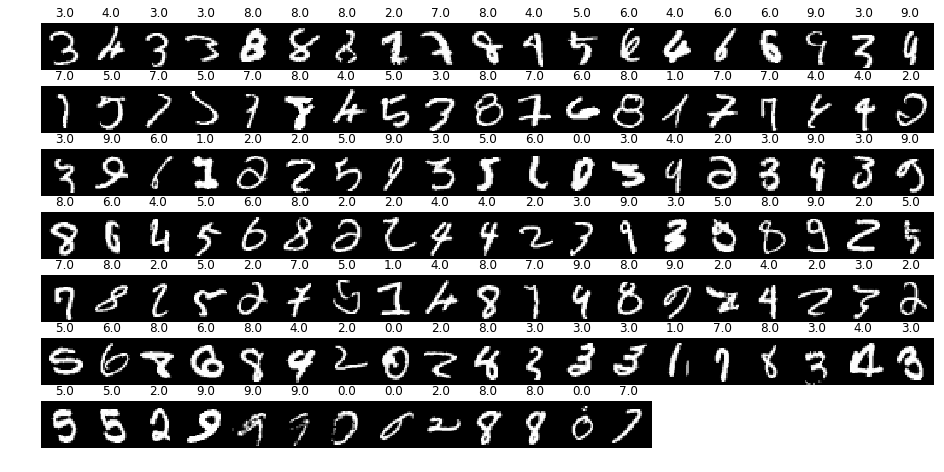

In [28]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)
for i in range(127):
    plt.subplot(7,19,i+1)
    d_images = X_test[errores_2.index_pasado[i]]
    pixels = d_images.reshape(28, 28)
    plt.imshow(pixels, cmap = 'gray')
    plt.axis ('off')
    plt.title(errores_2.real[i])
    plt.ylabel('h')
    plt.subplots_adjust(hspace = 0.1, wspace = 0) #Separación de los plots para la buena visualización de los títulos.
print('\nEstos fueron los 127 números que ninguno de los dos modelos logró predecir correctamente. Encima de cada uno está el valor verdadero.')
plt.show()